In [1]:
import pandas as pd
import numpy as np
import csv
from collections import Counter
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [13]:
# 리뷰 출력시 ... 없이 전부 나오게 설정
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [2]:
workerbee_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_preprocessed.csv", index_col=0)

In [33]:
def kw_in_df(keyword):
    print("'", keyword, "' 가 포함된 리뷰 총", len(workerbee_data[workerbee_data['contents'].apply(lambda x:keyword in x)]['contents']),'건')
    return workerbee_data[workerbee_data['contents'].apply(lambda x:keyword in x)]['contents']

In [83]:
def kw_in_nouns(keyword):
    print("'", keyword, "' 가 포함된 리뷰 총", len(workerbee_data[workerbee_data['token_nouns_bareun'].apply(lambda x:keyword in x)]['contents']),'건')
    return workerbee_data[workerbee_data['token_nouns_bareun'].apply(lambda x:keyword in x)]['contents']

In [34]:
def wc_kw(kw_option, keyword):
    if kw_option == 1: # 1은 용언 키워드, 2는 명사 키워드
        return wc_analysis(workerbee_data[workerbee_data['contents'].apply(lambda x:keyword in x)]['token_verbs_bareun'])
    elif kw_option == 2:
        return wc_analysis(workerbee_data[workerbee_data['contents'].apply(lambda x:keyword in x)]['token_nouns_bareun'])
    else:
        return print('옵션 확인')

In [16]:
workerbee_data.head(1)

,itemNo,itemName,lastSalePrice,heartCount,reviewCount,itemReviewNo,optionValue,userId,point,contents,isGift,insertTimestamp,token_nouns_bareun,token_verbs_bareun,sentiment_label,sentiment_score
0,1308881,[꿀카라멜] 워커비 허니 얼그레이 카라멜 50g,3000,7126,796,6390415,['[구매단위]박스구매(12개입)'],hai***,5,"°고마운 일이 생겨, 지인분께 선물로도 드리고~ 나도 먹고! 재주문 했어요~, 포장이 너무 귀엽! 얼그레이 향이 진하게 코 끝에!",F,2023-08-11 05:42:48,"[일, 지인, 분, 선물, 나, 재, 주문, 포장, 귀엽, 얼그레이, 향, 코, 끝]","[고맙, 생기, 드리, 먹, 하, 진하]",1,0.994407


In [7]:
workerbee_data['token_nouns_bareun'] = workerbee_data['token_nouns_bareun'].apply(lambda x: eval(x))
workerbee_data['token_verbs_bareun'] = workerbee_data['token_verbs_bareun'].apply(lambda x: eval(x))

In [104]:
workerbee_data['sentiment_label'].value_counts()

sentiment_label
1    4965
0     145
Name: count, dtype: int64

In [3]:
def frequency_analysis(data, n):
    words = pd.DataFrame(Counter(sum(data.to_list(), [])).most_common(n), columns = ['Token','Frequency'])
    return words

In [4]:
#워드클라우드 함수
def wc_analysis(data):
    words = dict(Counter(sum(data.to_list(), [])).most_common(300))
    #img = Image.open("C:/Users/NT550-048/Desktop/잇더/rice.jpg")
    #imgArray = np.array(img)
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='black',colormap = "Accent_r",
                        width=800, height=500).generate_from_frequencies(words)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud) 
    plt.axis('off')
    plt.show()

### 명사 분석

In [39]:
noun_frequency = frequency_analysis(workerbee_data['token_nouns_bareun'], 500)

In [45]:
noun_frequency.to_excel(r'C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\wokerbee_analysis\noun_frequency.xlsx')

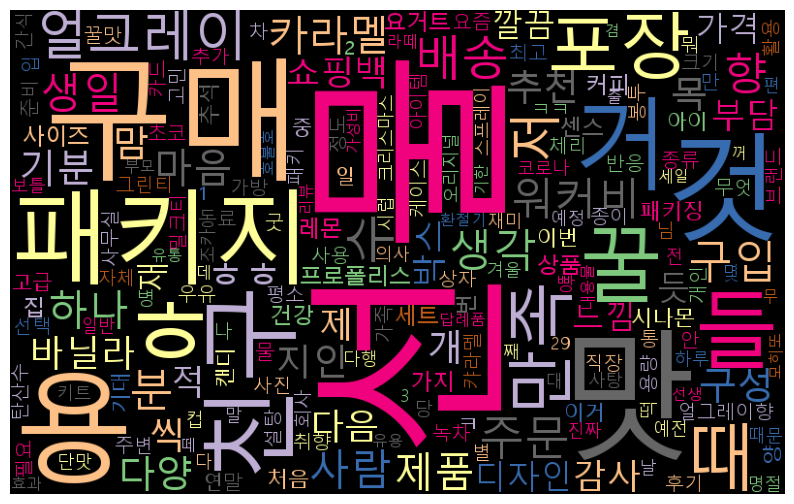

In [32]:
wc_analysis(workerbee_data['token_nouns_bareun'])

In [111]:
workerbee_data[workerbee_data['sentiment_label']==0]['contents']

14                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                생각보다 제입맛에는 별로,, 근데 친구는 맛있다고 하더라고요 친구 다 줬습니다,,ㅠ 기대 많이 했는ㄱ데ㅠ
25                                                                                                                                         

In [109]:
frequency_analysis(workerbee_data[workerbee_data['sentiment_label']==0]['token_nouns_bareun'], 500)

,Token,Frequency
0,맛,92
1,거,60
2,선물,48
3,것,42
4,구매,32
5,얼그레이,30
6,꿀,27
7,생각,26
8,제품,22
9,향,20


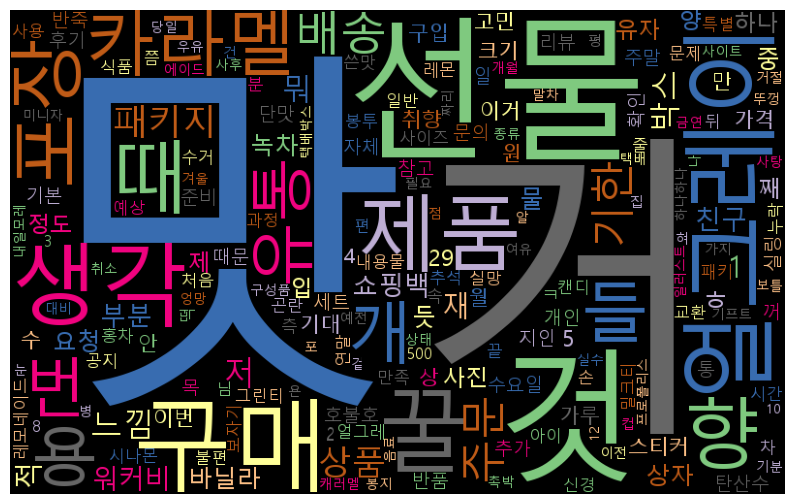

In [107]:
wc_analysis(workerbee_data[workerbee_data['sentiment_label']==0]['token_nouns_bareun'])

In [128]:
kw_in_nouns('트렌디')

' 트렌디 ' 가 포함된 리뷰 총 8 건


836     결혼 앞둔 친구가 면역력도 떨어지고 해서 건강 챙기라는 의미+꿀 떨어지는 신혼생활 하라는 의미로 선물했어요🥰 패키지도 트렌디하고 다양한 맛 구성이라 좋아요!
1513                                 선물용으로 구매했습니다,,! 트렌디하고 건강한 느낌이라 너무 좋네요! 받는 분도 너무 좋아하십니다..^^
2345                                    꿀 세트랑 같이 선물용으로 구입했습니다! 머그컵 너무 귀엽고 트렌디해서 받는 분이 너무 좋아해줬슴다
2413                                        패키지도 너무 트렌디하고 맛도 좋아요!! 선물했는데 부담없이 줄 수 있는 선물인 거 같네요 
2769                            가벼운 선물용으로 샀어요 패키징 트렌디하고 예뻐요 제가 먹어볼 수는 없어서 맛은 모르지만 디자인은 확실히 예쁘네요
2830                           설 선물용으로 드렸는데 다들 떡에 드시고 맛있다고 하더라구용 !! 패키지도 이뻐서 트렌디하다고 눈도장 찍었네영 ㅎㅎ
4571                                        너무 트렌디한 상품인것 같아요 :) 색감부터 받는 사람 주는 사람 모두 기분이 좋아져요 :)
4875                                                            선물했는데 포장이 트렌디하고 너무 예뻐서 기분이 좋아요!
Name: contents, dtype: object

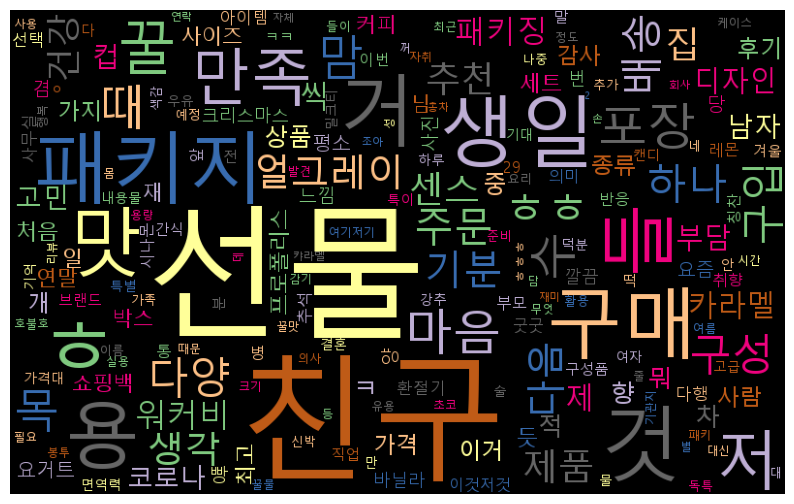

In [118]:
wc_kw(2, '친구')

In [ ]:
# 선물
present_kw = ['엽서']

꿀 선물은 왠지 올드해보였는데 워커비 만나고 편견이 싹 사라졌어요 스틱형이라 간편하게 꿀차를 마실수 있고 패키지들이 하나같이 감성터집니다!! 

선물용으로 샀는데 쇼핑백도 색상이 넘 이쁘네요. 캐릭터가 귀여워 보는사람도 같이 기분이 좋아 집니다.

In [ ]:
# 포장
package_kw = ['패키지', '포장', '쇼핑백', '디자인', '패키징', '고급', '패키', '보틀', '케이스', '키트', '용기', '색감', '포장지', '보자기', '캔', '스티커']

### 용언 분석

In [14]:
frequency_analysis(workerbee_data['token_verbs_bareun'], 300)

,Token,Frequency
0,하,7355
1,좋,3466
2,이,2494
3,먹,2106
4,있,1543
5,같,1507
6,맛있,1274
7,보,1216
8,귀엽,1182
9,좋아하,1064


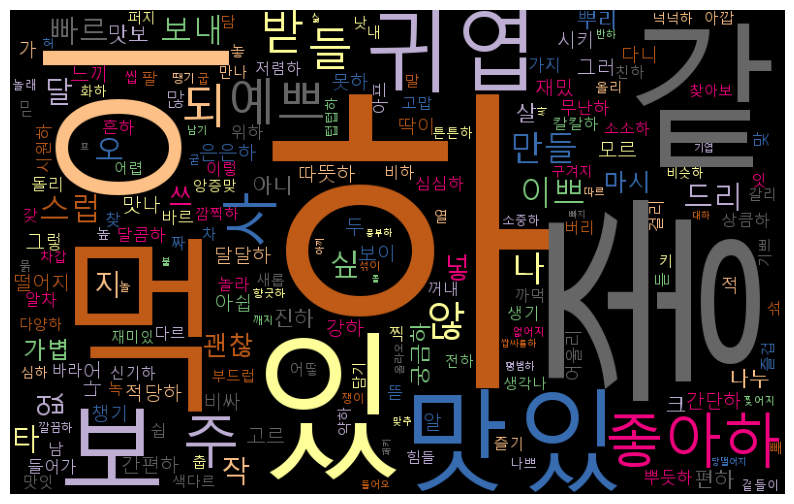

In [18]:
wc_analysis(workerbee_data['token_verbs_bareun'])

'귀엽다'

In [25]:
kw_in_df('귀엽')

' 귀엽 ' 가 포함된 리뷰 총 581 건


0                                                                                                                                             °고마운 일이 생겨, 지인분께 선물로도 드리고~ 나도 먹고! 재주문 했어요~, 포장이 너무 귀엽! 얼그레이 향이 진하게 코 끝에!
17                                                                                                                                                                                            선물용으로 구매해봤는데 패키지가 귀엽네요. 
30                                                                                                                                                           얼그레이향이 진하게 나서 너무 맛있었어요~ 패키지도 너무 귀엽고 맛있어서 한 통 순삭할 뻔 했어요:) 
37                                                                                                                                                            잘받았어요 배송은 다음날 바로와서 빨랐어요 산물용으로 주문했는데 패키지가 다 귀엽네요 맛있을것 같아요
65                                                                                                                                          

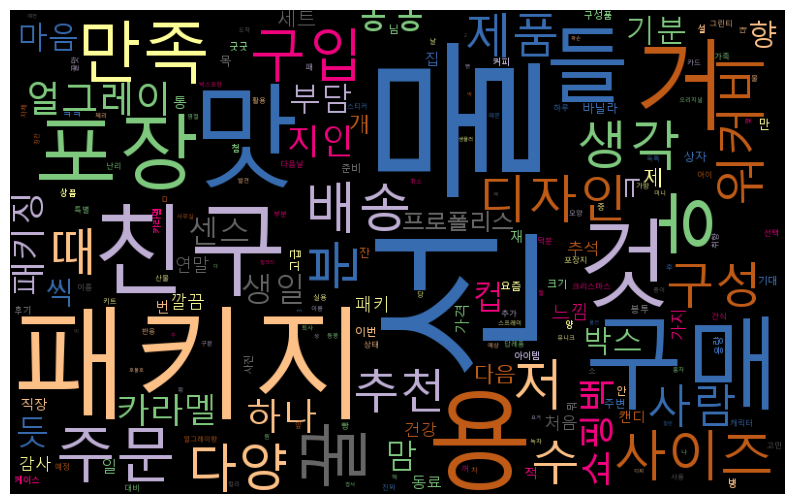

In [30]:
wc_kw(2, '귀엽')